In [1]:
import numpy as nb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("D:\Projects\Tempurature Anomalies Prediction/Northern Hemisphere Monthly Temperature 1880-2022.csv",sep=",",encoding="utf-8")

In [3]:
df.head()

,Year,Month,Temperature
0,1880,1,-0.36
1,1881,1,-0.31
2,1882,1,0.26
3,1883,1,-0.58
4,1884,1,-0.17


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716 entries, 0 to 1715
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         1716 non-null   int64  
 1   Month        1716 non-null   int64  
 2   Temperature  1716 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 40.3 KB


In [5]:
df["Temperature"].describe()

count    1716.000000
mean        0.086603
std         0.475834
min        -1.510000
25%        -0.240000
50%         0.000000
75%         0.320000
max         1.940000
Name: Temperature, dtype: float64

In [6]:
df["Temperature"].describe(include="All")

count    1716.000000
mean        0.086603
std         0.475834
min        -1.510000
25%        -0.240000
50%         0.000000
75%         0.320000
max         1.940000
Name: Temperature, dtype: float64

In [7]:
df["Year"].value_counts()

1880    12
1978    12
1972    12
1973    12
1974    12
        ..
1928    12
1929    12
1930    12
1931    12
2022    12
Name: Year, Length: 143, dtype: int64

In [8]:
df["Month"].value_counts()

1     143
2     143
3     143
4     143
5     143
6     143
7     143
8     143
9     143
10    143
11    143
12    143
Name: Month, dtype: int64

C:\Users\Hepton\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Temperature'>

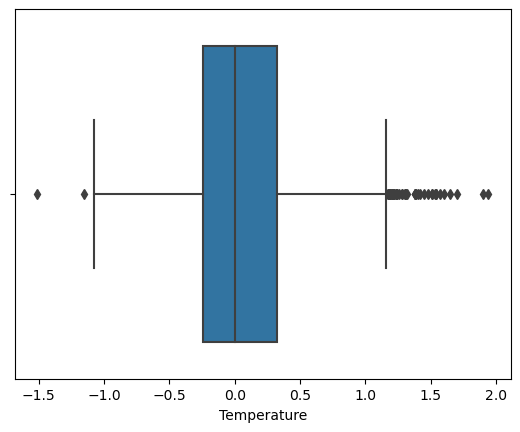

In [9]:
sns.boxplot(df["Temperature"])

## Information

In [10]:
# Average Anomaly
# maximum positive
# maximum negative
# no. of positive (hot)
# no. of negative (cool)
# no. of standard

In [11]:
def info(month):
    pos=neg=stand=0
    anomaly=[]
    max_pos=[]
    max_neg=[]
    if month == "January":
        mon=1
    elif month == "February":
        mon=2
    elif month == "March":
        mon=3
    elif month == "April":
        mon=4
    elif month == "May":
        mon=5
    elif month == "June":
        mon=6
    elif month == "July":
        mon=7
    elif month == "August":
        mon=8
    elif month == "September":
        mon=9
    elif month == "October":
        mon=10
    elif month == "November":
        mon=11
    elif month == "December":
        mon=12
    else:
        mon="error_month"
    if mon=="error_month":
        print("The Month Spelling Is Error")
    else:
        for i in range(1716):
            if(df["Month"][i]==mon):
                anomaly.append(df["Temperature"][i])
                if (df["Month"][i]==mon and df["Temperature"][i]>0):
                    pos+=1
                    max_pos.append(df["Temperature"][i])
                elif (df["Month"][i]==mon and df["Temperature"][i]<0):
                    neg+=1
                    max_neg.append(abs(df["Temperature"][i]))
                elif (df["Month"][i]==mon and df["Temperature"][i]==0):
                    stand+=1
        print("Average Anomalies in ",month," ",nb.mean(anomaly))
        print("no. of Standard Times: ",stand)
        print("no. of Positive (Hot) Times: ",pos)
        print("Maximum Positive Anomaly in ",month," ",max(max_pos))
        print("no. of Negative (Cool) Times: ",neg)
        print("Maximum Negative Anomaly in ",month," ",max(max_neg))

In [31]:
x=input()
info(x)

March
Average Anomalies in  March   0.11531468531468528
no. of Standard Times:  5
no. of Positive (Hot) Times:  70
Maximum Positive Anomaly in  March   1.9
no. of Negative (Cool) Times:  68
Maximum Negative Anomaly in  March   0.8


## Predict

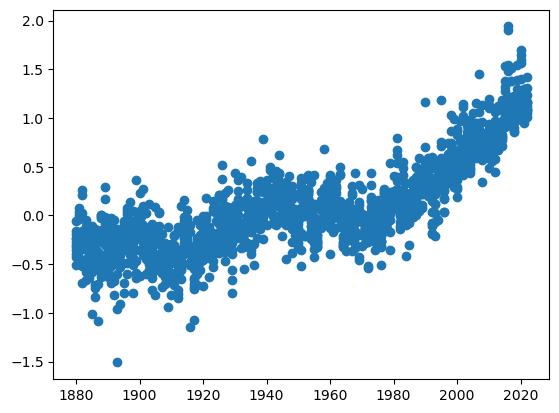

In [14]:
plt.scatter(x= df['Year'], y = df['Temperature'])

In [15]:
x = df.drop(['Temperature'] , axis = 1).values
y = df['Temperature'].values

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size = 0.25 , random_state=42)

In [41]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [42]:
reg.fit(x_train,y_train)

LinearRegression()

In [43]:
reg.score(x_train , y_train)

0.6385314683391194

In [44]:
reg.score(x_test,y_test)

0.6100112552801191

In [45]:
reg.intercept_

-18.012942661997027

In [49]:
reg.coef_

array([0.00927531, 0.00066163])

In [47]:
reg.predict([[2025,3]])[0]

0.7715471984948152